In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [1]:
from sklearn.datasets import make_classification

In [19]:
X,y = make_classification(n_features=2, n_classes=2,n_samples=20, n_redundant=0, random_state = 100)

In [58]:
df = pd.DataFrame( {'x1' : X[:,0], 'x2' : X[:,1],  'class' : y})

In [59]:
df.head()

,x1,x2,class
0,-0.168370,-1.127657,0
1,0.842434,1.033355,1
2,0.609092,-1.035768,0
3,-1.512582,-1.607638,0
4,1.921388,2.426807,1


In [14]:
y[:5]

array([1, 1, 1, 0, 0])

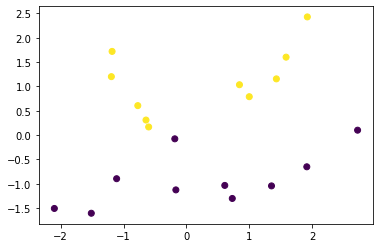

In [20]:
plt.scatter(X[:,0], X[:,1],c  = y)

In [21]:
from sklearn.linear_model import LogisticRegression

In [22]:
model = LogisticRegression()
model.fit(X,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [24]:
y_pred_prob = model.predict_proba(X)

In [25]:
y_pred_prob

array([[0.89682319, 0.10317681],
       [0.15721951, 0.84278049],
       [0.90845352, 0.09154648],
       [0.92855226, 0.07144774],
       [0.01827004, 0.98172996],
       [0.94633197, 0.05366803],
       [0.79104547, 0.20895453],
       [0.29922325, 0.70077675],
       [0.24365629, 0.75634371],
       [0.52312532, 0.47687468],
       [0.02102794, 0.97897206],
       [0.07622209, 0.92377791],
       [0.05594747, 0.94405253],
       [0.88770504, 0.11229496],
       [0.89422373, 0.10577627],
       [0.1845718 , 0.8154282 ],
       [0.93171922, 0.06828078],
       [0.15721863, 0.84278137],
       [0.36497151, 0.63502849],
       [0.71372813, 0.28627187]])

In [34]:
cef = model.coef_
cef

array([[-0.4027697 ,  1.96602316]])

In [40]:
cef.shape

(1, 2)

In [28]:
model.intercept_

array([-0.01322879])

#### First row probability

In [29]:
r1 = X[0]

In [30]:
r1

array([-0.16836972, -1.12765715])

In [41]:
v = model.intercept_ + (r1[0] * cef[0,0]) + (r1[1] * cef[0,1])

In [42]:
v

array([-2.16241464])

In [43]:
1 / (1 + np.exp(v))

array([0.89682319])

#### Second row probability

In [44]:
r2 = X[1]

In [45]:
r2

array([0.84243402, 1.03335467])

In [46]:
v = model.intercept_ + (r2[0] * cef[0,0]) + (r2[1] * cef[0,1])

In [47]:
v

array([1.67906354])

In [48]:
1 / (1 + np.exp(v))

array([0.15721951])

In [51]:
y_pred = model.predict(X)

In [55]:
y_pred.shape, y_pred_prob.shape

((20,), (20, 2))

In [56]:
pd.DataFrame( {'y1' : y_pred_prob[:,0], 'y2' : y_pred_prob[:,1],  'class' : y_pred})

,y1,y2,class
0,0.896823,0.103177,0
1,0.157220,0.842780,1
2,0.908454,0.091546,0
3,0.928552,0.071448,0
4,0.018270,0.981730,1
5,0.946332,0.053668,0
6,0.791045,0.208955,0
7,0.299223,0.700777,1
8,0.243656,0.756344,1
9,0.523125,0.476875,0
